**Étape 1 : Installer les bibliothèques nécessaires**


Avant de commencer, assure-toi d'avoir les bibliothèques nécessaires installées. Tu peux les installer avec les commandes suivantes dans ton terminal ou ta console Python 

In [3]:
pip install numpy pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [5]:
df = pd.read_csv("C:/Users/Amina CEO/Desktop/Cours Python/src/df_arabica_clean (1).csv")

In [6]:
df

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,202,202,Brazil,Fazenda Conquista,019/22,Dry Mill,NaN,Ipanema Coffees,950,Sul de Minas,...,80.08,11.4,0,0,green,4,"February 2nd, 2024",Brazil Specialty Coffee Association,"Rua Gaspar Batista Paiva, 416 – Santa Luiza Va...",Chris Allen - 55 35 3212-4705
203,203,203,Nicaragua,Finca San Felipe,017-053-0155,Beneficio Atlantic Sébaco,017-053-0155,Exportadora Atlantic S.A,1200,Matagalpa,...,80.00,10.4,0,2,green,12,"March 2nd, 2024",Asociación de Cafés Especiales de Nicaragua,"Del Hotel Seminole 2 C al lago, 1 C arriba.",Maria Ines Benavidez Toval - 011-(505)-8396 4717
204,204,204,Laos,-,105/3/VL7285-005,DRY MILL,105/3/VL7285-005,Marubeni Corporation,1300,Bolaven Plateau,...,79.67,11.6,0,9,green,11,"November 11th, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
205,205,205,El Salvador,"Rosario de Maria II, Area de La Pila",0423A01,"Optimum Coffee, San Salvador, El Salvador",NaN,Aprentium Enterprises LLC,1200,"Volcan de San Vicente, La Paz, El Salvador",...,78.08,11.0,0,12,bluish-green,13,"March 7th, 2024",Salvadoran Coffee Council,"Final 1a. Av. Norte y 13 Calle Pte., dentro de...",Tomas Bonilla - (503) 2505-6600


In [7]:
country_counts = df['Country of Origin'].value_counts().reset_index()
country_counts.columns = ['Country of Origin', 'count']

In [8]:
print(country_counts)

               Country of Origin  count
0                         Taiwan     61
1                      Guatemala     21
2                       Colombia     19
3                       Honduras     13
4                       Thailand     12
5                       Ethiopia     11
6                         Brazil     10
7                     Costa Rica      8
8                      Nicaragua      7
9                    El Salvador      7
10  Tanzania, United Republic Of      6
11        United States (Hawaii)      5
12                        Mexico      4
13                          Peru      4
14                       Vietnam      4
15                        Uganda      3
16                     Indonesia      3
17                          Laos      3
18                        Panama      2
19                         Kenya      2
20                    Madagascar      1
21                       Myanmar      1


In [9]:
total_iteration_count = country_counts['count'].head(7).sum()
print(total_iteration_count)

147


In [10]:
country_counts['percentage'] = (country_counts['count'] / country_counts['count'].sum()) * 100
print(country_counts)

               Country of Origin  count  percentage
0                         Taiwan     61   29.468599
1                      Guatemala     21   10.144928
2                       Colombia     19    9.178744
3                       Honduras     13    6.280193
4                       Thailand     12    5.797101
5                       Ethiopia     11    5.314010
6                         Brazil     10    4.830918
7                     Costa Rica      8    3.864734
8                      Nicaragua      7    3.381643
9                    El Salvador      7    3.381643
10  Tanzania, United Republic Of      6    2.898551
11        United States (Hawaii)      5    2.415459
12                        Mexico      4    1.932367
13                          Peru      4    1.932367
14                       Vietnam      4    1.932367
15                        Uganda      3    1.449275
16                     Indonesia      3    1.449275
17                          Laos      3    1.449275
18          

In [11]:
pays_conserves = ["Taiwan", "Guatemala"]

In [12]:
df['Country of Origin'] = df['Country of Origin'].apply(lambda x: x if x in pays_conserves else 'Other')

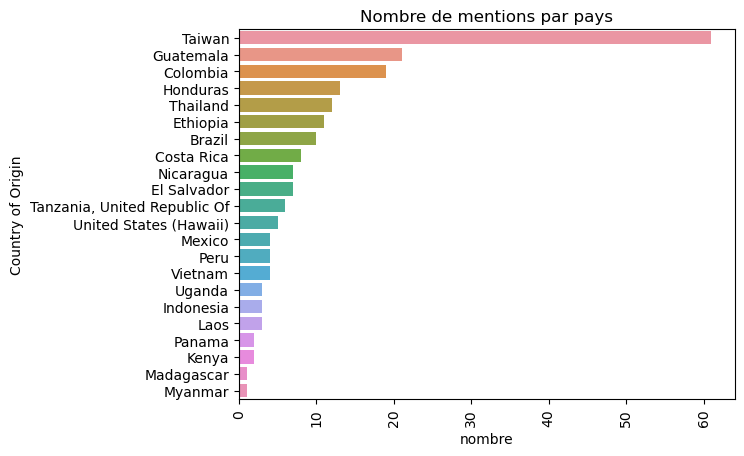

In [13]:
sns.barplot(x='count', y='Country of Origin', data=country_counts)
plt.xlabel('nombre')
plt.ylabel('Country of Origin')
plt.title('Nombre de mentions par pays')
plt.xticks(rotation=90)
plt.show()

In [14]:
country_counts = df['Country of Origin'].value_counts().reset_index()
country_counts.columns = ['Country of Origin', 'count']
print(country_counts)

  Country of Origin  count
0             Other    125
1            Taiwan     61
2         Guatemala     21


In [15]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)
newdf.iloc[:,range(3,13)].corr()**2

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall
Aroma,1.000000,0.676964,0.629480,0.508255,0.400816,0.555991,0.000788,NaN,NaN,0.642827
Flavor,0.676964,1.000000,0.768798,0.657614,0.547389,0.725539,0.001581,NaN,NaN,0.770619
Aftertaste,0.629480,0.768798,1.000000,0.663310,0.545640,0.742959,0.000572,NaN,NaN,0.749284
Acidity,0.508255,0.657614,0.663310,1.000000,0.585507,0.648404,0.003914,NaN,NaN,0.706579
Body,0.400816,0.547389,0.545640,0.585507,1.000000,0.666016,0.001928,NaN,NaN,0.595378
Balance,0.555991,0.725539,0.742959,0.648404,0.666016,1.000000,0.007932,NaN,NaN,0.782282
Uniformity,0.000788,0.001581,0.000572,0.003914,0.001928,0.007932,1.000000,NaN,NaN,0.005565
Clean Cup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sweetness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Overall,0.642827,0.770619,0.749284,0.706579,0.595378,0.782282,0.005565,NaN,NaN,1.000000


In [16]:
df.isnull().any()

Unnamed: 0               False
ID                       False
Country of Origin        False
Farm Name                 True
Lot Number                True
Mill                      True
ICO Number                True
Company                  False
Altitude                  True
Region                    True
Producer                  True
Number of Bags           False
Bag Weight               False
In-Country Partner       False
Harvest Year             False
Grading Date             False
Owner                    False
Variety                   True
Status                   False
Processing Method         True
Aroma                    False
Flavor                   False
Aftertaste               False
Acidity                  False
Body                     False
Balance                  False
Uniformity               False
Clean Cup                False
Sweetness                False
Overall                  False
Defects                  False
Total Cup Points         False
Moisture

In [17]:
features_list = ["Aroma", "Flavor", "Aftertaste", "Acidity","Body","Balance","Category Two Defects","Quakers"] # composantes de x
x = df.loc[:,features_list]
y = df.loc[:,"Country of Origin"]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)


In [19]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
train_score = model.score(x_train, y_train)
print(f'Score d\'entraînement : {train_score * 100:.2f}%')

Score d'entraînement : 100.00%


In [21]:
y_pred = model.predict(x_test)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Précision du modèle: {accuracy * 100:.2f}%')

Précision du modèle: 78.57%


In [24]:
# Ici c'est le code pour sortir de loverfitting ,
# jai modifier les nombres d'arbres, de profondeur, d"échantillon etc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Définir la grille des hyperparamètres à rechercher
param_grid = {
    'n_estimators': [100, 200, 250],  # Essayez différents nombres d'arbres
    'max_depth': [10, 20, 30],  # Essayez différentes profondeurs d'arbre
    'min_samples_split': [5, 12, 20],  # Essayez différents nombres d'échantillons pour la division
    'min_samples_leaf': [4, 5, 8]  # Essayez différents nombres d'échantillons pour les feuilles
}

# Créer un modèle RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Recherche des meilleurs hyperparamètres avec la validation croisée
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", grid_search.best_params_)

# Utiliser les meilleurs hyperparamètres pour créer un nouveau modèle
best_model = grid_search.best_estimator_

# Entraîner le modèle avec les meilleurs hyperparamètres
best_model.fit(x_train, y_train)

# Score d'entraînement avec les meilleurs hyperparamètres
train_score = best_model.score(x_train, y_train)
print(f'Score d\'entraînement : {train_score * 100:.2f}%')

# Faire des prédictions sur l'ensemble de test
y_pred = best_model.predict(x_test)

# Calculer la précision avec les meilleurs hyperparamètres
accuracy = accuracy_score(y_test, y_pred)
print(f'Précision du modèle: {accuracy * 100:.2f}%')


Meilleurs hyperparamètres : {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 20, 'n_estimators': 200}
Score d'entraînement : 75.15%
Précision du modèle: 66.67%
